# Relatório de Análise VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,17.14,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN,33.33,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento


In [4]:
dados['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Vista Alegre', 'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Praça Seca', 'Piedade', 'Lagoa', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Rocha Miranda', 'Engenho Novo', 'Engenho de Dentro',
       'Cidade Nova', 'Pilares', 'Tomás Coelho', 'Água Santa',
       'São Cristóvão', 'Ilha do Governador', 'Jardim Sulacap',
       'Oswaldo Cruz', 'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque',
       'Vaz Lobo', 'Madureira', 'São Francisco Xavier', 'Pe

#### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [5]:
dados['Valor'].mean()

4985.730140445705

In [6]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [7]:
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [8]:
grupo_bairro = dados.groupby('Bairro')

In [9]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
grupo_bairro.groups

{'Barra da Tijuca': [6, 16, 18, 23, 32, 34, 37, 44, 45, 58, 63, 64, 67, 71, 77, 82, 97, 111, 114, 116, 122, 133, 136, 138, 142, 156, 159, 161, 171, 172, 180, 195, 198, 217, 224, 231, 234, 243, 246, 249, 254, 269, 275, 285, 287, 302, 303, 304, 306, 313, 319, 322, 336, 346, 347, 356, 371, 377, 379, 385, 391, 398, 400, 411, 423, 444, 445, 447, 448, 451, 461, 463, 474, 475, 477, 485, 488, 497, 508, 514, 518, 526, 553, 554, 555, 556, 559, 563, 568, 570, 571, 572, 601, 605, 606, 608, 612, 614, 619, 629, ...], 'Botafogo': [25, 50, 91, 92, 115, 124, 132, 140, 206, 210, 235, 345, 373, 426, 427, 512, 539, 541, 561, 611, 669, 706, 740, 777, 786, 846, 851, 885, 940, 949, 953, 1036, 1073, 1110, 1121, 1140, 1147, 1158, 1171, 1197, 1235, 1239, 1258, 1285, 1318, 1332, 1341, 1355, 1386, 1421, 1453, 1458, 1496, 1559, 1572, 1623, 1676, 1704, 1720, 1750, 1794, 1795, 1843, 1869, 1878, 1881, 1908, 1978, 1987, 2012, 2014, 2029, 2041, 2051, 2092, 2130, 2133, 2145, 2147, 2148, 2152, 2161, 2216, 2217, 2233, 224

In [11]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7073.721754654425
Botafogo -> 8690.962879640045
Copacabana -> 4137.4135556361
Flamengo -> 4148.489626556016
Ipanema -> 9375.905
Leblon -> 8757.75411119812
Tijuca -> 2042.1940700808625


In [12]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7073.72,3626.94
Botafogo,8690.96,999.19
Copacabana,4137.41,1153.37
Flamengo,4148.49,1105.25
Ipanema,9375.91,2249.54
Leblon,8757.75,2110.54
Tijuca,2042.19,726.21


In [13]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [14]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatísticas Descritivas

In [15]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3921.0,7073.72,11804.46,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,889.0,8690.96,150826.94,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2759.0,4137.41,3596.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


In [16]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [17]:
# para usar no jupter
# %matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

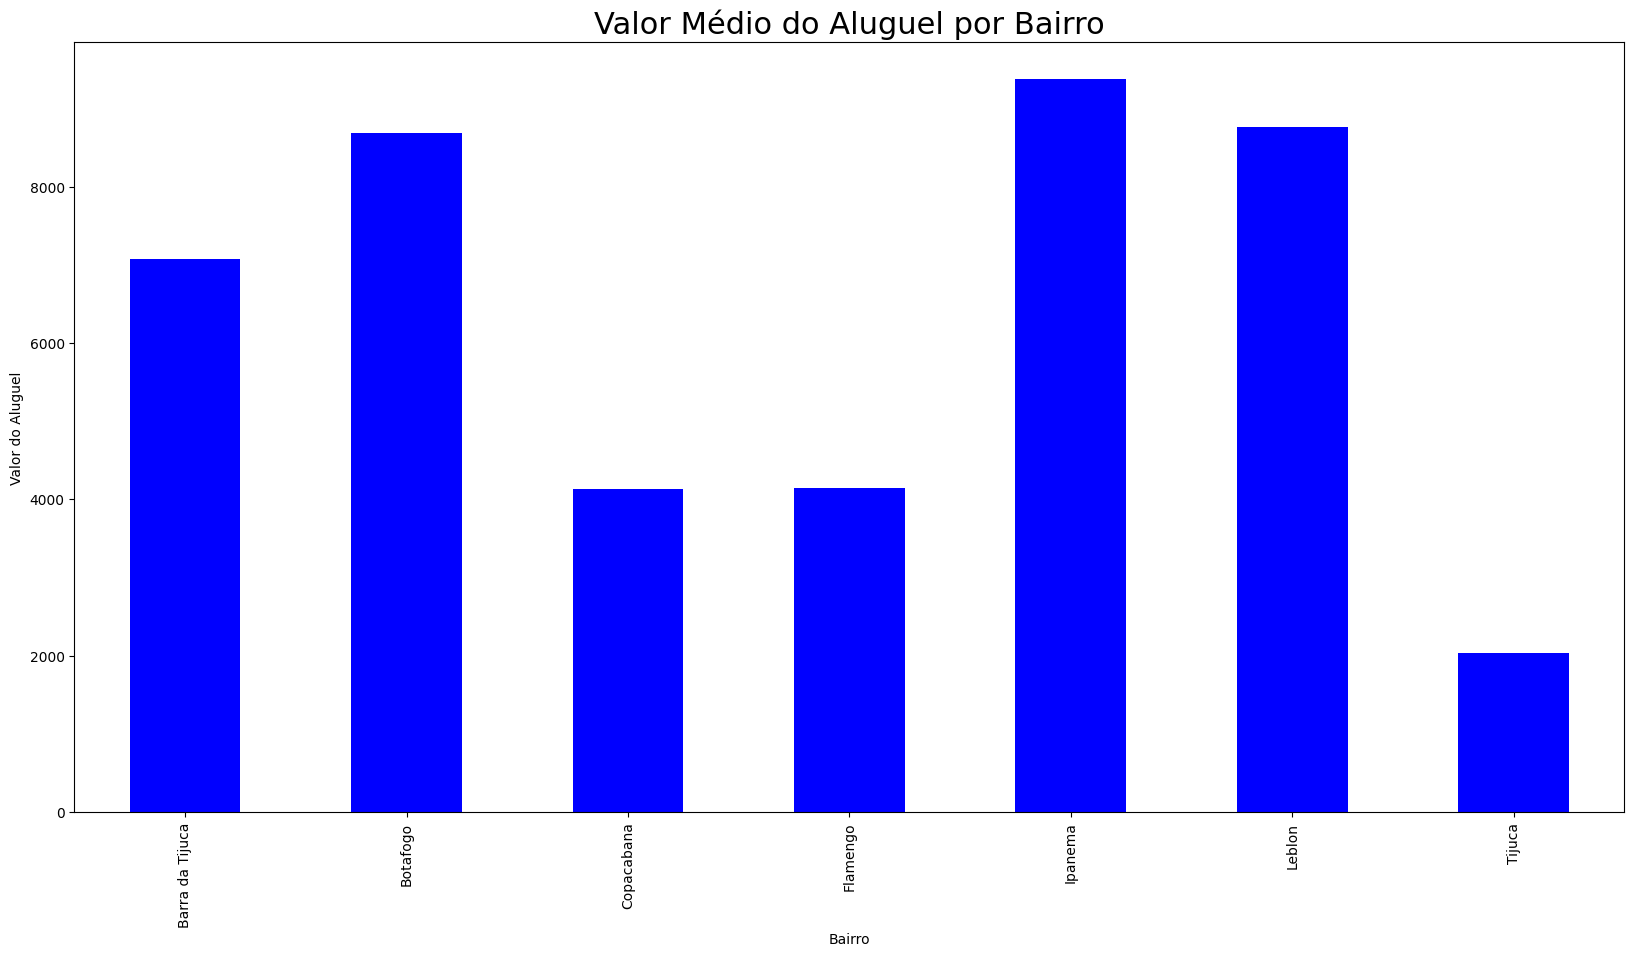

In [18]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

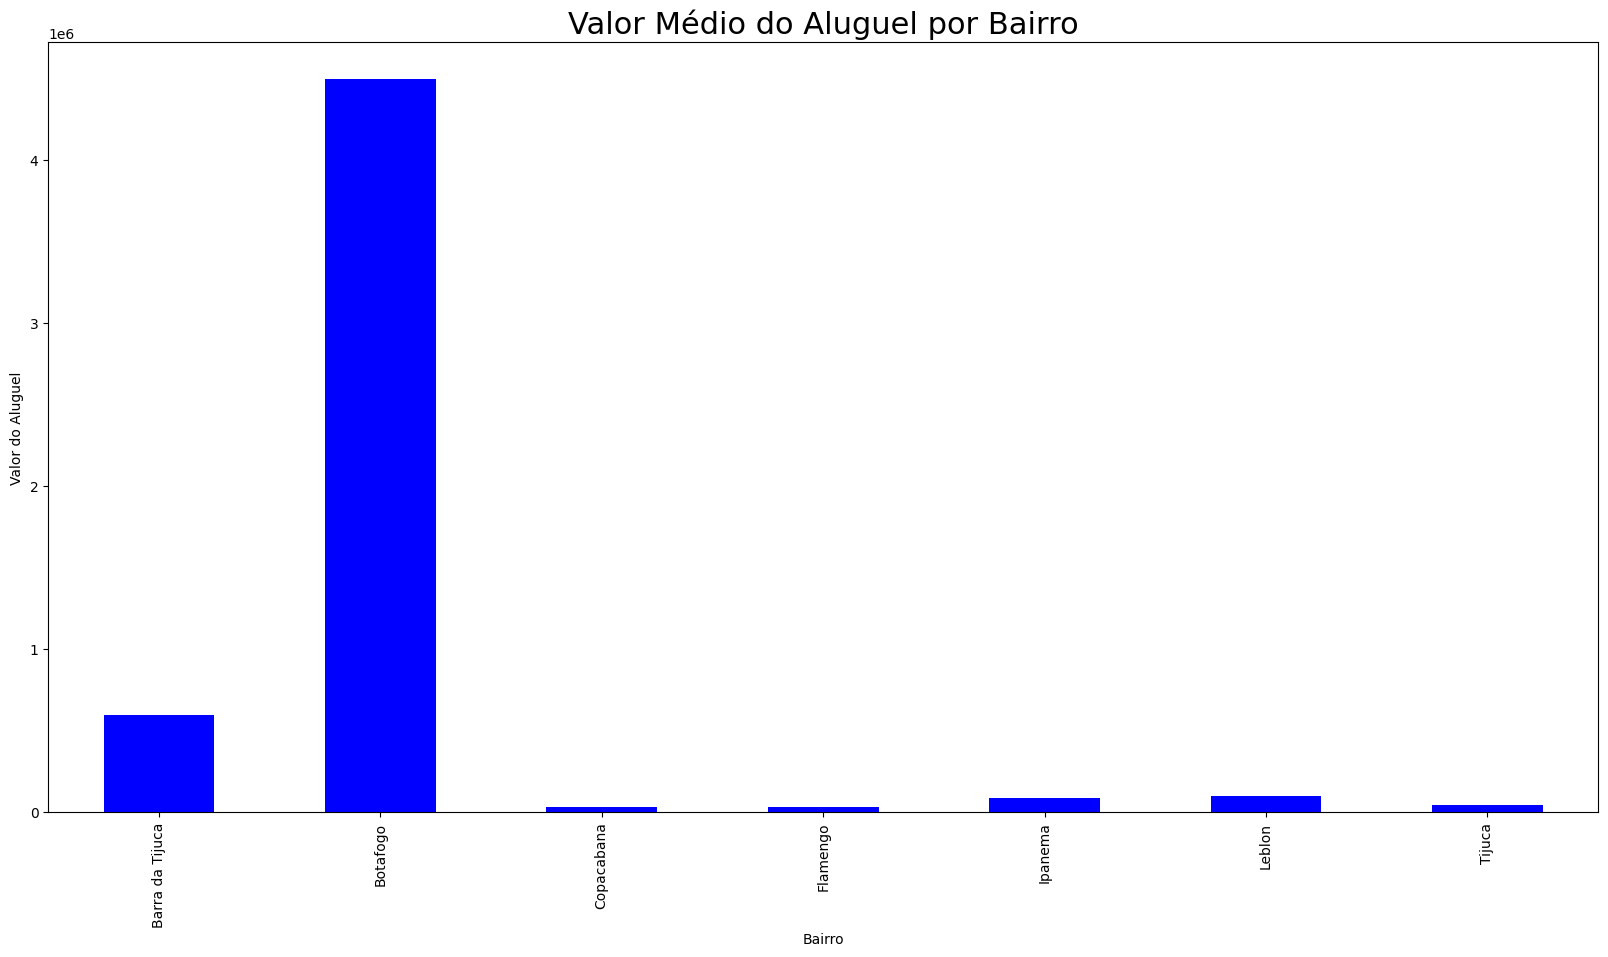

In [19]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [20]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [21]:
produtos = precos.groupby('Produto', sort = False)
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [22]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2) # type: ignore

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
Batata,3.96,0.26,3.69,4.2


In [23]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].agg(['mean', 'std']) 

,mean,std
Produto,,
Cebola,2.060000,0.409512
Tomate,3.426667,0.518684
Batata,3.960000,0.256320
